In [115]:
import pandas as pd

In [116]:
df=pd.read_excel('/content/side_effect_data 1.xlsx' , engine='openpyxl')

In [117]:
print(df.head())

   Kullanici_id Cinsiyet Dogum_Tarihi    Uyruk         Il  \
0           107     Male   1960-03-01  Turkiye  Canakkale   
1           140     Male   1939-10-12  Turkiye    Trabzon   
2             2   Female   1976-12-17  Turkiye  Canakkale   
3            83     Male   1977-06-17  Turkiye      Adana   
4             7   Female   1976-09-03  Turkiye      Izmir   

                         Ilac_Adi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi  \
0                 trifluoperazine            2022-01-09        2022-03-04   
1                fluphenazine hcl            2022-01-09        2022-03-08   
2                 warfarin sodium            2022-01-11        2022-03-12   
3                   valproic acid            2022-01-04        2022-03-12   
4  carbamazepine extended release            2022-01-13        2022-03-06   

                Yan_Etki Yan_Etki_Bildirim_Tarihi Alerjilerim  \
0               Kabizlik      2022-02-19 18:28:43       Ceviz   
1              Yorgunluk      2022-02-03

In [118]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [119]:
print(df.describe())

       Kullanici_id                   Dogum_Tarihi  \
count   2357.000000                           2357   
mean      97.216801  1974-11-25 04:06:12.677131936   
min        1.000000            1939-10-12 00:00:00   
25%       47.000000            1959-02-05 00:00:00   
50%       97.000000            1973-09-09 00:00:00   
75%      146.000000            1992-03-24 00:00:00   
max      196.000000            2011-04-25 00:00:00   
std       57.017200                            NaN   

               Ilac_Baslangic_Tarihi              Ilac_Bitis_Tarihi  \
count                           2357                           2357   
mean   2022-01-07 10:47:36.173101312  2022-03-10 16:25:27.365294848   
min              2022-01-01 00:00:00            2022-03-02 00:00:00   
25%              2022-01-04 00:00:00            2022-03-06 00:00:00   
50%              2022-01-07 00:00:00            2022-03-11 00:00:00   
75%              2022-01-11 00:00:00            2022-03-15 00:00:00   
max             

In [120]:
print(df.isnull().sum())

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64


In [121]:
import matplotlib.pyplot as plt

In [122]:
df['Ilac_Bitis_Tarihi']=pd.to_datetime(df['Ilac_Bitis_Tarihi'])
df['Yan_Etki_Bildirim_Tarihi']=pd.to_datetime(df['Yan_Etki_Bildirim_Tarihi'])

In [123]:
df['Ilac_Bitis_Tarihi']=df['Ilac_Bitis_Tarihi'].map(pd.Timestamp.toordinal)
df['Yan_Etki_Bildirim_Tarihi']=df['Yan_Etki_Bildirim_Tarihi'].map(pd.Timestamp.toordinal)

In [124]:
korelasyon=df[['Ilac_Bitis_Tarihi','Yan_Etki_Bildirim_Tarihi']].corr().iloc[0,1]
print(f'ılac Bitim Tarihinden Itibaren Yan Etki Bildirim Korelasyonu:{korelasyon}')

ılac Bitim Tarihinden Itibaren Yan Etki Bildirim Korelasyonu:0.00820247435829249


In [125]:
if korelasyon > 0:
  print('Pozitif bir korelasyon var')
elif korelasyon < 0:
  print('Negatif bir korelasyon var.')
else:
    print('Korelasyon yok.')

Pozitif bir korelasyon var


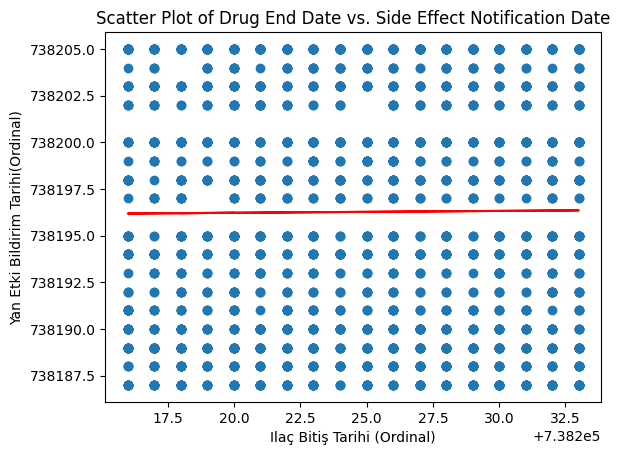

In [126]:
plt.scatter(df['Ilac_Bitis_Tarihi'],df['Yan_Etki_Bildirim_Tarihi'])
plt.xlabel('Ilaç Bitiş Tarihi (Ordinal)')
plt.ylabel('Yan Etki Bildirim Tarihi(Ordinal)')
plt.title('Scatter Plot of Drug End Date vs. Side Effect Notification Date')

import numpy as np
m, b=np.polyfit(df['Ilac_Bitis_Tarihi'] , df['Yan_Etki_Bildirim_Tarihi'],1)
plt.plot(df['Ilac_Bitis_Tarihi'], m*df['Ilac_Bitis_Tarihi'] + b, color='red')
plt.show()

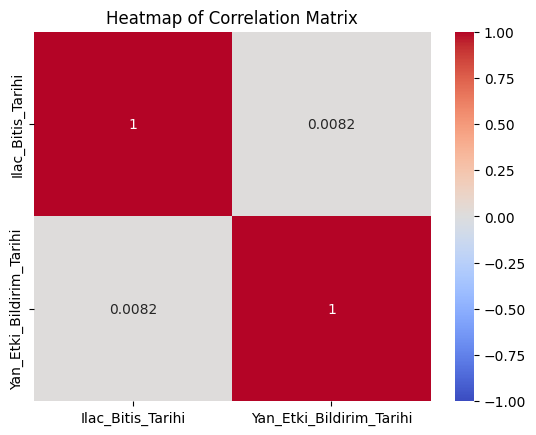

In [127]:
import seaborn as sns

corr=df[['Ilac_Bitis_Tarihi','Yan_Etki_Bildirim_Tarihi']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [128]:
import pandas as pd
df=pd.read_excel('/content/side_effect_data 1.xlsx' , engine='openpyxl')

# Eksik verileri kontrol etme
missing_data_count = df.isnull().sum()
missing_data_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_data_count,
    'Percentage': missing_data_percentage
})
print("Eksik Veriler:")
print(missing_data_summary[missing_data_summary['Missing Values'] > 0])


Eksik Veriler:
                                  Missing Values  Percentage
Cinsiyet                                     778   33.008061
Il                                           227    9.630887
Alerjilerim                                  484   20.534578
Kronik Hastaliklarim                         392   16.631311
Baba Kronik Hastaliklari                     156    6.618583
Anne Kronik Hastaliklari                     217    9.206619
Kiz Kardes Kronik Hastaliklari                97    4.115401
Erkek Kardes Kronik Hastaliklari             121    5.133644
Kan Grubu                                    347   14.722104
Kilo                                         293   12.431056
Boy                                          114    4.836657


In [129]:
from sklearn.impute import SimpleImputer


numerical_features = ['Kilo', 'Boy']
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])


In [130]:

categorical_features = ['Cinsiyet', 'Il', 'Alerjilerim', 'Kronik Hastaliklarim',
                        'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
                        'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari', 'Kan Grubu']
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = imputer.fit_transform(df[categorical_features])


In [131]:

missing_data_count = df.isnull().sum()
missing_data_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_data_count,
    'Percentage': missing_data_percentage
})
print("Eksik Veriler Sonrası:")
print(missing_data_summary[missing_data_summary['Missing Values'] > 0])


Eksik Veriler Sonrası:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [132]:
target = 'Yan_Etki'
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]


In [133]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)


In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_pipeline.fit(X_train, y_train)


y_pred = model_pipeline.predict(X_test)


accuracy_rate = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rate:.4f}")


Accuracy: 0.0636
